# Project: Investigate TMDB-Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I am using the TMDB-Movies dataset for this data analysis. 

## Things we will know through this data analysis
> <ul>     
    <li> How is movies production rate in different years? </li>
    <li> What are factors for high profitable movies? </li>
    <li> What are the properties of most popular movies? </li>
    <li> How profits have changed throught years? </li>
</ul>

In [1]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section I have kept the data I need to find the informations i need and dropped the rest. 

### General Properties

In [2]:
# Loading data
df = pd.read_csv('tmdb-movies.csv')

# verifying if data load was successful 
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# number of rows and columns
df.shape

(10866, 21)

In [4]:
# properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#properties
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# null values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# duplicate values
sum(df.duplicated())

1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002737247F708>,
      dtype=object)

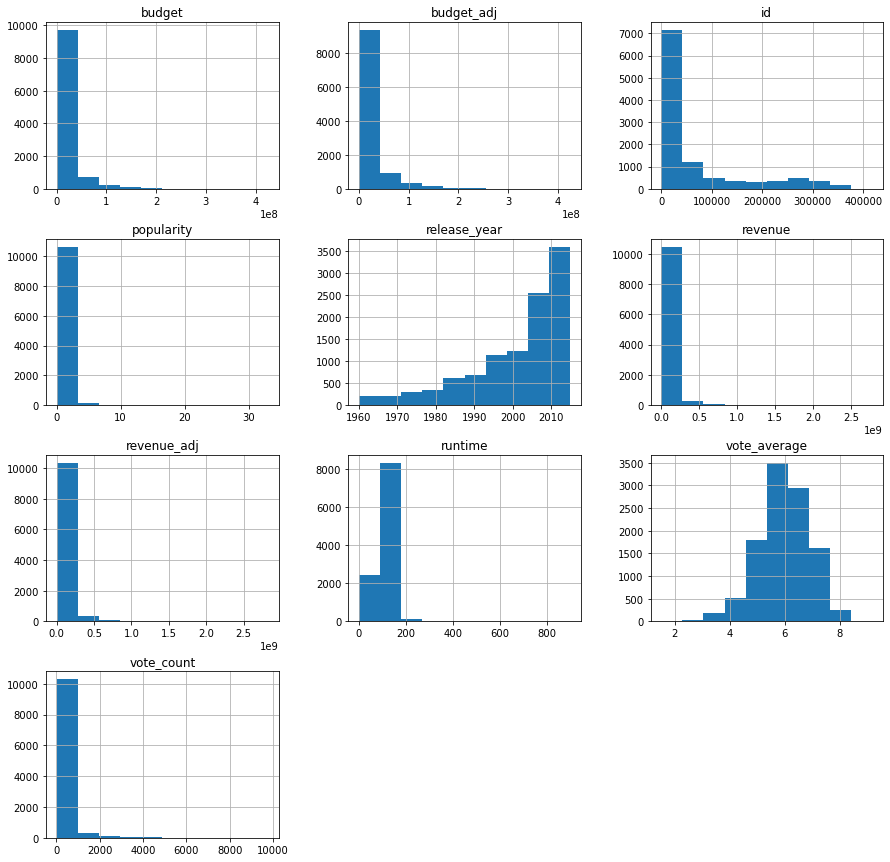

In [8]:
df.hist(figsize=(15,15))

### Observation

<ul> 
    <li> There are total 10866 columns and 21 rows </li>
    <li> 3 data types present </li>
    <li> 1 duplicate data </li>
    <li> several null columns </li>
    <li> some numbers are in scienticific form </li>
    <li> Some rows have 0 values </li>
    </ul>

### Data Cleaning 

To clean data I have done following things

<ul>     
    <li> Changed scientific numbers </li>
    <li> Dropped duplicates </li>
    <li> Dropped unnecessary columns </li>
    <li> Dropped null values </li>
</ul>

In [9]:
# changing scientific numbers
pd.options.display.float_format = '{:.2f}'.format

In [10]:
# verifying if numbers changed
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00,10866.00
mean,66064.18,0.65,14625701.09,39823319.79,102.07,217.39,5.97,2001.32,17551039.82,51364363.25
std,92130.14,1.00,30913213.83,117003486.58,31.38,575.62,0.94,12.81,34306155.72,144632485.04
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,0.00,0.00
25%,10596.25,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,20669.00,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,75610.00,0.71,15000000.00,24000000.00,111.00,145.75,6.60,2011.00,20853251.08,33697095.72
max,417859.00,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41


In [11]:
#dropping duplicate data
df.drop_duplicates(inplace = True)

In [12]:
sum(df.duplicated())

0

In [13]:
#dropping unnecessary columns
df.drop(['cast', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace= True)

In [14]:
df.shape

(10865, 13)

In [15]:
#changing columns
drop_null=['revenue','budget','runtime']

In [16]:
# converting 0 to NAN
df[drop_null]=df[drop_null].replace(0, np.NAN)
#dropping null values
df.dropna(axis=0, inplace=True)

In [17]:
#checking null values
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
director                0
runtime                 0
genres                  0
production_companies    0
vote_count              0
vote_average            0
release_year            0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis


>### Research Question 1: How is movies production rate in different years?

In [18]:
# range of xticks, yticks
df.groupby('release_year')['id'].count().describe()

count    56.00
mean     67.98
std      61.60
min       4.00
25%      13.00
50%      48.50
75%     118.75
max     196.00
Name: id, dtype: float64

([<matplotlib.axis.XTick at 0x273740d4408>,
 <a list of 12 Text major ticklabel objects>)

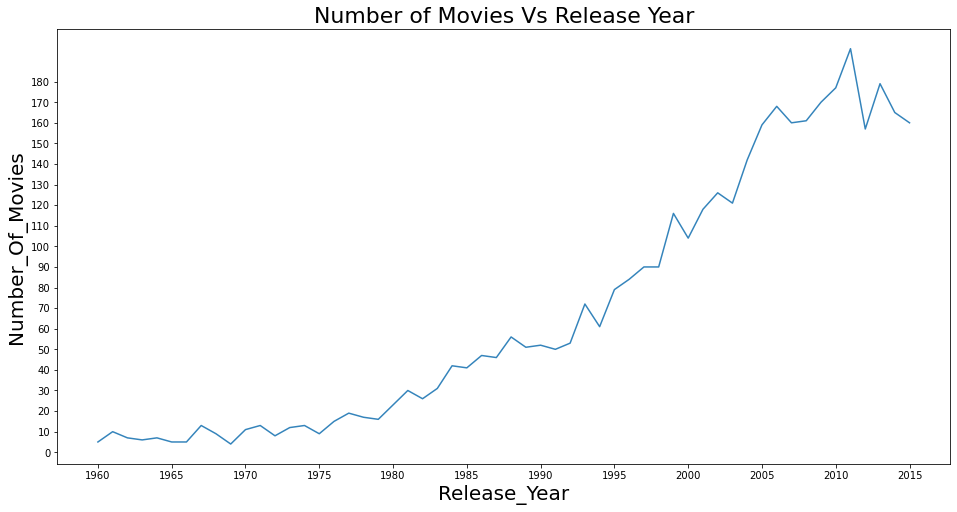

In [19]:
#plotting
df.groupby('release_year')['id'].count().plot(kind='line',alpha=.9,figsize=(16,8))
#for x axis
plt.xlabel('Release_Year',fontsize=20)
#for y axis
plt.ylabel('Number_Of_Movies',fontsize=20)
plt.title('Number of Movies Vs Release Year',fontsize=22)
plt.yticks(np.arange(0,190,10))
plt.xticks(np.arange(1960,2020,5))

> #### Comment
><li>We see number of movies increasing till somewhat around 2010 and after that we see a slight fall</li>

> ### Research Question 2: What are factors for high profitable movies?

In [20]:
# inserting profit column
# profit = revenue - budget
df.insert(5,'profit',df['revenue']-df['budget'])

In [21]:
df.profit.describe()

count         3807.00
mean      71327119.23
std      151345821.53
min     -413912431.00
25%       -1175565.50
50%       20472776.00
75%       83461285.00
max     2544505847.00
Name: profit, dtype: float64

In [22]:
#creating new column based on profitability
profit_range=[-413912431,-453814.25,23720477,90509863.25,2544505847]
profit_level=['very_low','low','medium','high']
df['profit_level']=pd.cut(df['profit'],profit_range,labels=profit_level)

In [23]:
# verifying
df.head()

,id,imdb_id,popularity,budget,revenue,profit,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit_level
0,135397,tt0369610,32.99,150000000.00,1513528810.00,1363528810.00,Jurassic World,Colin Trevorrow,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.50,2015,high
1,76341,tt1392190,28.42,150000000.00,378436354.00,228436354.00,Mad Max: Fury Road,George Miller,120.00,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.10,2015,high
2,262500,tt2908446,13.11,110000000.00,295238201.00,185238201.00,Insurgent,Robert Schwentke,119.00,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.30,2015,high
3,140607,tt2488496,11.17,200000000.00,2068178225.00,1868178225.00,Star Wars: The Force Awakens,J.J. Abrams,136.00,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.50,2015,high
4,168259,tt2820852,9.34,190000000.00,1506249360.00,1316249360.00,Furious 7,James Wan,137.00,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.30,2015,high


Text(0.5, 1.0, 'Profitability Vs Vote_Average')

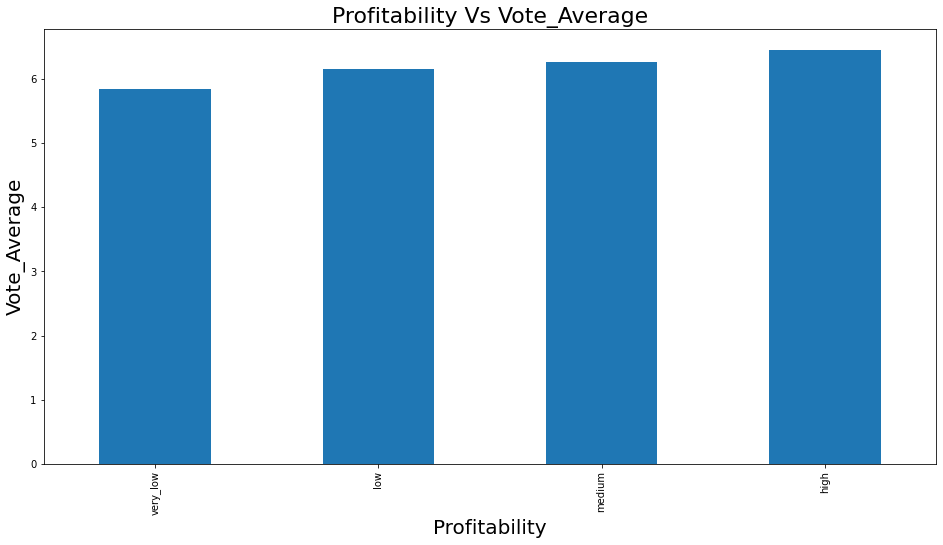

In [24]:
#plotting
df.groupby('profit_level')['vote_average'].mean().plot(kind='bar',figsize=(16,8))
plt.ylabel('Vote_Average',fontsize=20)
plt.xlabel('Profitability',fontsize=20)
plt.title('Profitability Vs Vote_Average',fontsize=22)

>#### Comment
><li>Movies with highest profit has the most votes</li>

Text(0.5, 1.0, 'Profitability Vs Runtime')

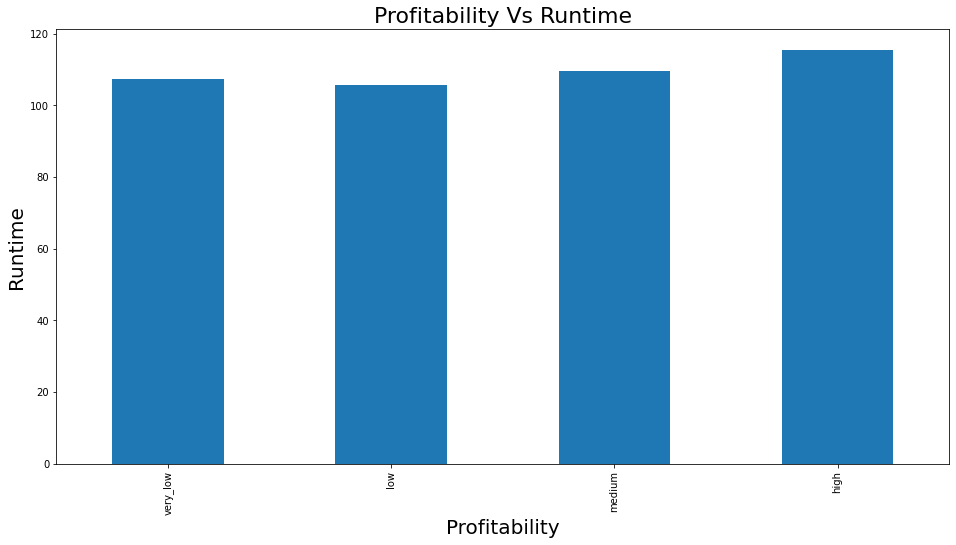

In [25]:
#plotting
df.groupby('profit_level')['runtime'].mean().plot(kind='bar',figsize=(16,8))
plt.ylabel('Runtime',fontsize=20)
plt.xlabel('Profitability',fontsize=20)
plt.title('Profitability Vs Runtime',fontsize=22)

>#### Comment
><li>Movies with highest profit has longer run times</li>

> ### Research Question 3: What are the properties of most popular movies?

In [26]:
df.popularity.describe()

count   3807.00
mean       1.20
std        1.48
min        0.01
25%        0.47
50%        0.81
75%        1.39
max       32.99
Name: popularity, dtype: float64

In [27]:
#creating a new column based on the popularity
pop_range=[0.01,0.50,0.86,1.44,32.99]
pop_level=['very_low','low','medium','high']
df['popularity_level']=pd.cut(df['popularity'],pop_range,labels=pop_level)

Text(0.5, 1.0, 'Vote_Average Vs Popularity')

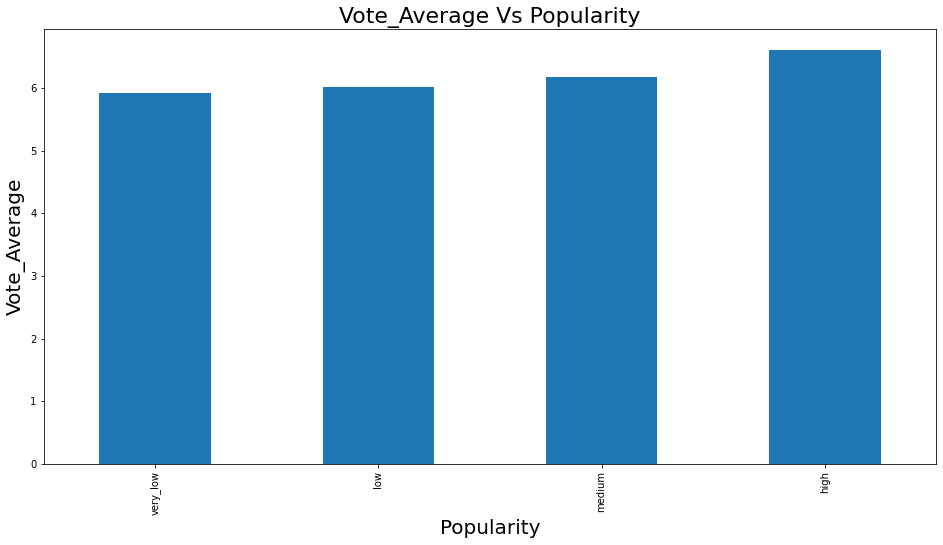

In [28]:
#plotting
df.groupby('popularity_level')['vote_average'].mean().plot(kind='bar',figsize=(16,8))
plt.ylabel('Vote_Average',fontsize=20)
plt.xlabel('Popularity',fontsize=20)
plt.title('Vote_Average Vs Popularity',fontsize=22)

>#### Comment
><li>Popular movies have highest number of votes</li>

Text(0.5, 1.0, 'Popularity Vs Runtime')

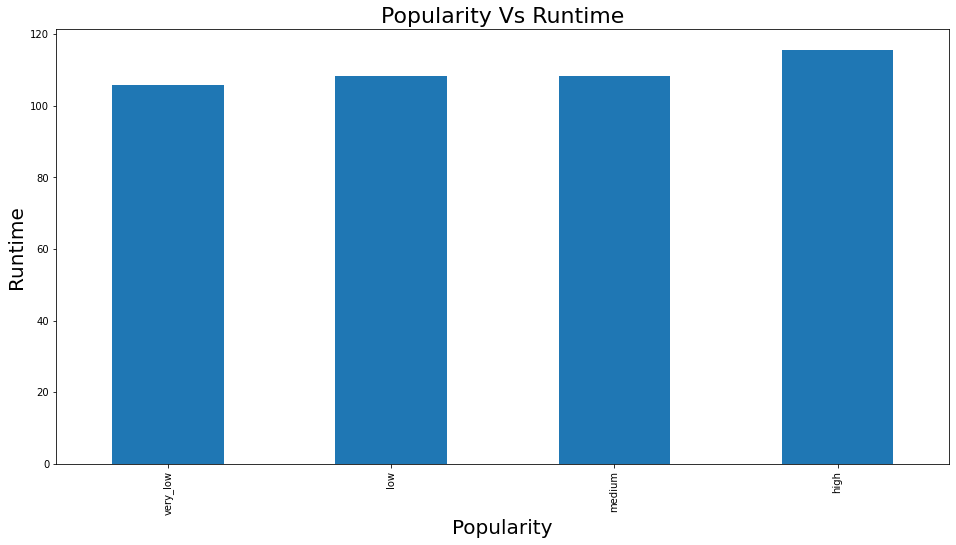

In [29]:
#plotting
df.groupby('popularity_level')['runtime'].mean().plot(kind='bar',figsize=(16,8))
plt.ylabel('Runtime',fontsize=20)
plt.xlabel('Popularity',fontsize=20)
plt.title('Popularity Vs Runtime',fontsize=22)

> ### Research Question 4: How profits have changed throught years?

In [30]:
df.profit.describe()

count         3807.00
mean      71327119.23
std      151345821.53
min     -413912431.00
25%       -1175565.50
50%       20472776.00
75%       83461285.00
max     2544505847.00
Name: profit, dtype: float64

In [31]:
# range of xticks, yticks
df.groupby('release_year')['profit'].sum().describe()

count            56.00
mean     4848970409.41
std      5292300041.71
min        52468689.00
25%       647020179.50
50%      2231767092.50
75%      8167084926.25
max     19032145273.00
Name: profit, dtype: float64

([<matplotlib.axis.XTick at 0x27374c43948>,
 <a list of 12 Text major ticklabel objects>)

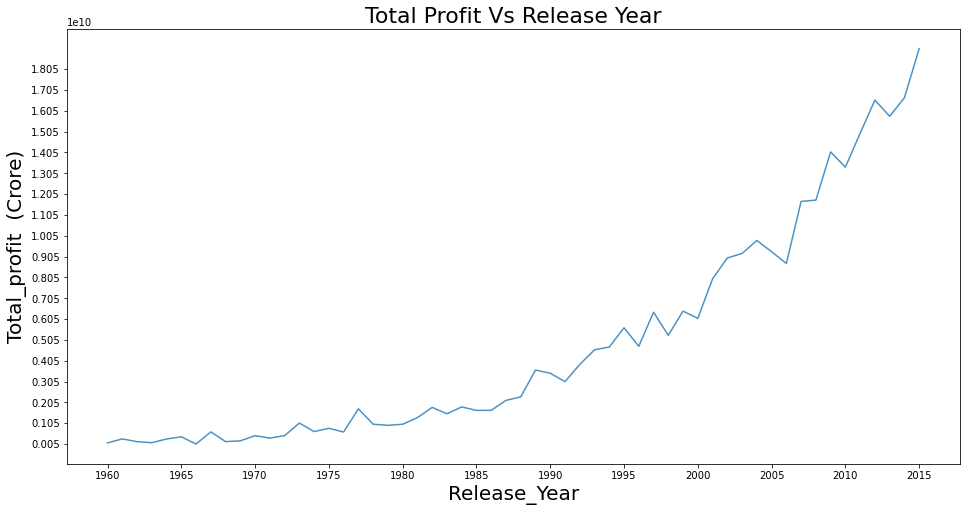

In [32]:
#plotting
df.groupby('release_year')['profit'].sum().plot(kind='line',alpha=.8,figsize=(16,8))
plt.xlabel('Release_Year',fontsize=20)
plt.ylabel('Total_profit  (Crore)',fontsize=20)
plt.title('Total Profit Vs Release Year',fontsize=22)
plt.yticks(np.arange(52468689,18919334715,1000000000))
plt.xticks(np.arange(1960,2020,5))

>#### Comment
><li>We see a almost steady curve of increasing profits throughout the years.</li>

<a id='conclusions'></a>
## Conclusions

> <ul>
    <li>We can see, around 2010 highest number of movies were produced </li>
    <li>Total amount of profit have benn increasing over the years. We can see a increase of profi</li>
    <li>Movies with higher budget got higer profit</li>
    <li>Most popular moveies got highe buget and has earned higher profit.</li>
    <li>Most profitable movies have a large budget and earned higher profits</li>
    <li>We can see from graph that the profits in movies are increasing in most years. We see a almost steady increasing.</li>
    </ul>

> ### limitations
> <ul><li> Missing data can affect the results. </li></ul>

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDB_Dataset.ipynb'])

0